### __Q posed by [@tobiasgalla](https://twitter.com/tobiasgalla):__ Multiple choice test, 5 questions. Each question has N answers, only 1 of which is correct. You score +2 for a correct answer, -1 for an incorrect answer, and 0 if the question is not answered. When you answer, you answer randomly. You pass the test if your total score is >=5. How many questions should you attempt to maximise $\mathcal{P}$(pass)? 

In [60]:
# Run me first :) 

from scipy.stats import binom
from matplotlib  import pyplot
from math        import ceil
from numpy       import arange

## Plot defaults ##
pyplot.rc('text', usetex=True)
pyplot.rcParams['text.latex.preamble'] = [
r'\usepackage{cmbright}',
r'\renewcommand{\familydefault}{\sfdefault}'
]
pyplot.rcParams.update({ 'xtick.major.width': 1.1, 'ytick.major.width': 1.1,
'axes.labelsize': 13, 'axes.linewidth': 1.2, 'axes.labelpad': 11,
'xtick.labelsize': 11, 'ytick.labelsize': 11, 'figure.figsize': [3, 4],
'font.size': 13, 'xtick.major.size': 4, 'ytick.major.size': 4 ,'legend.fontsize': 13})
pyplot.rcParams['xtick.minor.visible'], pyplot.rcParams['xtick.top'] = True,True
pyplot.rcParams['ytick.minor.visible'], pyplot.rcParams['ytick.right'] = True,True
pyplot.rcParams['xtick.direction'], pyplot.rcParams['ytick.direction'] = 'in','in'

When you choose to answer a question, the problem becomes binary -- you either get it right or wrong. 

Choose random variable $X$ = number of correct answers. For one question, we can say _a priori_ that if we pick one of $N$ answers randomly, then $\mathcal{P}$(correct answer) $=\frac{1}{N}$, and $\mathcal{P}$(incorrect answer) $=\frac{N-1}{N}$. 

For $n$ answered questions, where $n\in\{ 3,4,5 \}$ due to needing at least 3 correct answers to pass, we can model this problem with a binomial distribution:

$$ \mathcal{P}(X=k)={n\choose k}\frac{1}{N^k}  \bigg(\frac{N-1}{N} \bigg)^{n-k}$$

Now, we are interested in the score: 

$$S = 2 \,\times \mathrm{num.~correct~answers} - \mathrm{num.~incorrect~answers.} $$
$$ = 2X - (n-X) $$
$$ = 3X - n. $$

The question poses that we should try to maximise $\mathcal{P}(\mathrm{pass}) = \mathcal{P}(S\geqslant 5).$ We can rearrange this for $X$:

$$\mathcal{P}(S\geqslant 5) = \mathcal{P}(3X-n\geqslant 5) $$
$$= \mathcal{P}(X\geqslant \frac{5+n}{3}).$$

We can compute this probability for different $N$ and $n$ by summing the individual probabilities from the binomial pmf, done in code below:

In [61]:
def cumulativeScoreProb(N,n):
    p = 1/N
    # Work out which integer values k are >= (5+n)/3
    kList = [i for i in range(ceil((5+n)/3),n+1)]
    # Return the sum of the binomial probabilities for each k
    return sum([binom.pmf(k=k,p=p,n=n) for k in kList])

Now we can plot this for $n\in\{ 3,4,5 \}$, and $N$ up to 20: 

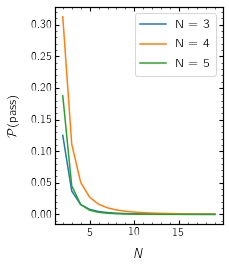

In [62]:
x = arange(2,20,1)

for n in range (3,6):
    probs = [cumulativeScoreProb(xi,n) for xi in x]
    pyplot.plot(x, probs, label='N = '+str(n))
    
# Formatting
pyplot.xlabel(r'$N$')
pyplot.ylabel(r'$\mathcal{P}$(pass)')
pyplot.legend()
pyplot.savefig('probs.pdf', bbox_inches='tight')